Importamos librerías

In [35]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

Definimos los simbolos a utilizar

In [3]:
x, y, z = sp.symbols('x y z')

Q = sp.Symbol('Q')

a, b, c = sp.symbols('a b c')

sigma = sp.Symbol('sigma')

Definimos la ecuación de la elipsoide:

In [4]:
ellips = sp.Eq(x**2/a**2 + y**2/b**2 + z**2/c**2, 1)
ellips

Eq(z**2/c**2 + y**2/b**2 + x**2/a**2, 1)

Definimos la ecuación de la densidad de carga de superficie

In [5]:
density = sp.Eq(sigma, Q/(4*sp.pi*a*b*c * sp.sqrt(x**2/a**4 + y**2/b**4 + z**2/c**4)))
density

Eq(sigma, Q/(4*pi*a*b*c*sqrt(z**2/c**4 + y**2/b**4 + x**2/a**4)))

# Parte a)

Primero definimos simbolos que vayamos a ocupar para esta parte

In [6]:
R, r = sp.symbols('R r')

Como el disco se encuentra en el plano ``xy``, primero vamos a usar la ecuación elipsoidal para dejar la ecuación de la densidad de carga en términos de ``x`` y ``y``:

In [7]:
sp.Eq(z**2/c**2, sp.solve(ellips, z**2/c**2)[0])

Eq(z**2/c**2, 1 - y**2/b**2 - x**2/a**2)

In [8]:
density.subs(z**2/c**2, sp.solve(ellips, z**2/c**2)[0])

Eq(sigma, Q/(4*pi*a*b*c*sqrt((1 - y**2/b**2 - x**2/a**2)/c**2 + y**2/b**4 + x**2/a**4)))

Como el disco se encuentra en el plan ``xy``, entonces $c=0$. Además al ser dos superficies (abajo y arriba), multiplicamos la ecuación por ``2``. Si simplificamos la anterior ecuación y aplicamos estas condiciones:

In [9]:
density_a = sp.Eq(sigma, Q/(4*sp.pi*a*b * sp.sqrt(1 - x**2/a**2 - y**2/b**2)))
density_a

Eq(sigma, Q/(4*pi*a*b*sqrt(1 - y**2/b**2 - x**2/a**2)))

Ahora como el disco es circular $a=b=R$:

In [10]:
sp.simplify(density_a.subs(a, R).subs(b, R))

Eq(sigma, Q/(4*pi*R**2*sqrt((R**2 - x**2 - y**2)/R**2)))

Además sabemos que $r^2=x^2+y^2$:

In [11]:
sp.simplify(density_a.subs(a, R).subs(b, R)).subs(x**2 + y**2, r**2)

Eq(sigma, Q/(4*pi*R**2*sqrt((R**2 - r**2)/R**2)))

In [38]:
density_a = sp.Eq(sigma, Q/(4*sp.pi*R * sp.sqrt(R**2 - r**2)))
density_a

Eq(sigma, Q/(4*pi*R*sqrt(R**2 - r**2)))

## Gráfico:

Para realizar los gráficos se van a tomar todos los parámetros que no sean la variable como unitarios:

/tmp/ipykernel_197412/2141192164.py:2: RuntimeWarning: divide by zero encountered in divide
  return 1/(4*np.pi*np.sqrt(1-np.power(r,2)))


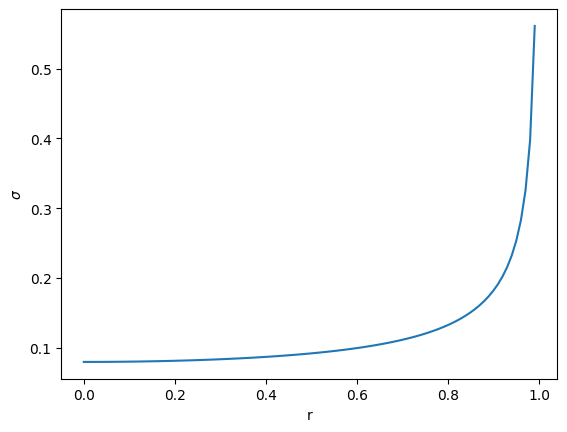

In [56]:
def Density_a(r):
    return 1/(4*np.pi*np.sqrt(1-np.power(r,2)))

r_lins = np.linspace(0,1,100)

plt.figure()

plt.xlabel('r')

plt.ylabel(r'$\sigma$')

plt.plot(r_lins, Density_a(r_lins))
plt.show()

# Parte b)

Primero definimos simbolos que vayamos a ocupar para esta parte

In [14]:
Lambda = sp.Symbol('Lambda')

Como la cinta, al igual que el disco se encuentra en el plano ``xy``, realizamos lo mismo que hicimos antes

In [15]:
density_b = sp.Eq(sigma, Q/(4*sp.pi*a*b * sp.sqrt(1 - x**2/a**2 - y**2/b**2)))
density_b

Eq(sigma, Q/(4*pi*a*b*sqrt(1 - y**2/b**2 - x**2/a**2)))

Ahora definimos $\Lambda$:

In [16]:
sp.Eq(Lambda, Q/(2*b))

Eq(Lambda, Q/(2*b))

Sustituyendo $\Lambda$:

In [17]:
density_b = density_b.subs(Q, 2*b*Lambda)
density_b

Eq(sigma, Lambda/(2*pi*a*sqrt(1 - y**2/b**2 - x**2/a**2)))

Como la cinta se extiende al $\infty$, realizamos el límite cuando $b \rightarrow \infty$:

In [18]:
sp.limit(density_b.rhs, b, 'oo')

Lambda/(2*pi*a*sqrt((a**2 - x**2)/a**2))

Simplificando:

In [19]:
density_b = sp.Eq(sigma, Lambda/(2*sp.pi * sp.sqrt(a**2 - x**2)))
density_b

Eq(sigma, Lambda/(2*pi*sqrt(a**2 - x**2)))

/tmp/ipykernel_197412/2153797903.py:2: RuntimeWarning: divide by zero encountered in divide
  return 1/(2*np.pi*np.sqrt(1-np.power(x,2)))


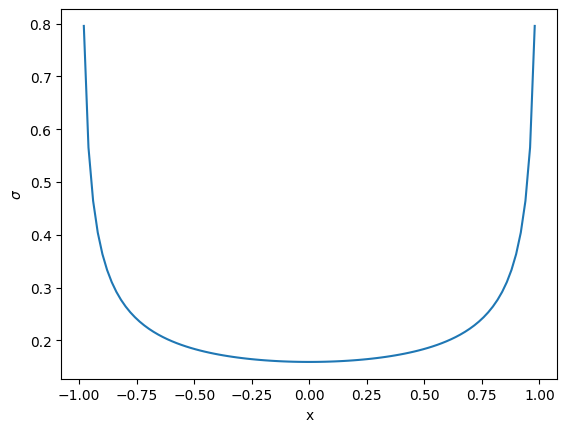

In [57]:
def Density_b(x):
    return 1/(2*np.pi*np.sqrt(1-np.power(x,2)))

x_lins = np.linspace(-1,1,100)

plt.figure()

plt.xlabel('x')

plt.ylabel(r'$\sigma$')

plt.plot(x_lins, Density_b(x_lins))
plt.show()

# Parte c)

Primero definimos simbolos que vayamos a ocupar para esta parte

In [21]:
dq = sp.Symbol('dq')
dx = sp.Symbol('dx')
ds = sp.Symbol('ds')
dr = sp.Symbol('dr')
lambda1 = sp.Symbol('lambda')

Vamos a modelar la aguja como un cilindro acostado sobre el eje ``x``. Como un cilindro se ve como un disco circular en el plano ``yz``, entonces $b=c$ y el radio de dicho disco sería $r² = y² + z²$. Realizando estos cambio, la ecuación elipsoidal y la ecuación de densidad se ven así:

In [22]:
sp.simplify(ellips.subs(c,b).subs(y**2, r**2 - z**2))

Eq(r**2/b**2 + x**2/a**2, 1)

In [23]:
density_c = sp.simplify(density.subs(c, b).subs(y**2, r**2 - z**2))
density_c

Eq(sigma, Q/(4*pi*a*b**2*sqrt(r**2/b**4 + x**2/a**4)))

La densidad de carga por unidad de longitud es $\lambda (x) = \frac{dq}{dx}$. Primero vamos a calcular el $dq$, que es la carga de un anillo de ancho $dx$:

In [24]:
delta_q = sp.Eq(dq, sigma*2*sp.pi*r*ds)
delta_q

Eq(dq, 2*pi*ds*r*sigma)

 donde $ds = \sqrt{dr² + dx²} = dx \sqrt{1+(\frac{dr}{dx})²}$

Para conseguir una relación $\frac{dr}{dx}$, derivamos la ecuación elipsoidal:

In [25]:
elips_deriv = sp.Eq(2*x*dx/a**2 + 2*r*dr/b**2, 0)
elips_deriv

Eq(2*dr*r/b**2 + 2*dx*x/a**2, 0)

Despejando $\frac{dr}{dx}$:

In [26]:
aux = sp.Eq(dr/dx, sp.solve(elips_deriv, dr)[0]/dx)
aux

Eq(dr/dx, -b**2*x/(a**2*r))

Sustituendo en $ds$:

In [27]:
sp.Eq(ds, dx * sp.sqrt(1 + (dr/dx)**2)).subs(dr/dx, aux.rhs)

Eq(ds, dx*sqrt(1 + b**4*x**2/(a**4*r**2)))

Sacando a factor común $\frac{b^4}{r^2}$ :

In [28]:
delta_s = sp.Eq(ds, dx * b**2/r * sp.sqrt(r**2/b**4 + x**2/a**4)).subs(dr/dx, aux.rhs)
delta_s

Eq(ds, b**2*dx*sqrt(r**2/b**4 + x**2/a**4)/r)

Volviendo a $\lambda (x)$:

In [29]:
delta_q = sp.simplify(delta_q.subs(ds, delta_s.rhs).subs(sigma, density_c.rhs))
delta_q

Eq(dq, Q*dx/(2*a))

Por último $\lambda (x) = \frac{dq}{dx}$

In [30]:
lineal_density = sp.Eq(lambda1, delta_q.rhs/dx)
lineal_density

Eq(lambda, Q/(2*a))

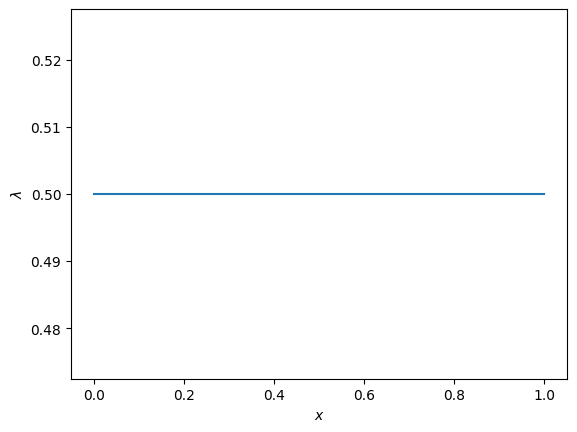

In [60]:
def Density_c(r):
    return 1/2

r_lins = np.linspace(0,1,100)

plt.figure()

plt.xlabel(r'$x$')

plt.ylabel(r'$\lambda$')

plt.plot(r_lins, [Density_c(i) for i in r_lins])
plt.show()